### Research: how well the photodiode signal correlates with Ed values (interpolated to the Lu response time).

#### Terminology:

**Ed (Downwelling Irradiance)** represents the incoming radiant flux (radiant power) from all directions of the upper hemisphere onto a surface (e.g., the Earth's surface or an object). It includes all the incoming electromagnetic radiation, regardless of the direction. It characterizes the total radiant energy received by a surface.

**Lu (Upwelling Radiance)** characterizes the radiant energy that is reflected or emitted by the surface and travels upward.

**Ld (Downwelling Radiance).** Is a measure of the brightness of the radiation coming from the upper hemisphere towards a specific point on the surface. It provides information about the intensity and directionality of the incoming radiation.

Ed represents the incoming energy,
Ld represents the incoming energy's intensity and directionality, and
Lu represents the outgoing energy from the surface or object.

**Photodiodes** are often used to measure the intensity of light in lux. When light falls on a photodiode, it generates an electrical signal, the strength of which is proportional to the illuminance (lux) of the incident light.

**Photodiode Signal and Reflectance Spectrum.** A light source illuminates a material, and the photodiode measures the intensity of the reflected light at various wavelengths. The resulting photodiode signal is used to create a reflectance spectrum, which provides information about how the material reflects light across the visual spectrum. With the photodiode signal in lux and the photopic data, which typically includes the photopic luminous efficiency function V(λ) as a function of wavelength (λ), we can "weighting" the illuminance measurement to account for the human eye's sensitivity to different wavelengths. This calculation provides a way to convert the measured illuminance into a quantity that represents the perceived brightness of light at that specific wavelength. The result is known as "luminance" or "brightness" at that particular wavelength.

**Hypstar water transfer protocol.** 
Ed - Downwelling Irradiance; Ld - Downwelling Radiance; Lu - Upwelling Radiance
Transfer protocol: [Ed 3x] - [Ld 3x] - [Lu 6x] - [Ld 3x] - [Ed 3x]. Sequential measurements.

### Table of contents


#### 1. Load in files
#### 2. Get monitorpd lx windows for each utc from and to pair
#### 3. See if stdev of monitorpd lx windows affects ed0 and ed1 correlation & plot results
<br>
<hr>

#### 1: Load files in

In [58]:
# _nc_files_HYPERNETS_W_LVES_L1B_IRR % find ../LVES -type f -name "HYPERNETS_W_LVES_L1B_IRR_*.nc" -exec cp {} . \;
# find ../DATA -type f -name "monitorPD.csv" -exec sh -c 'new_name="./$(basename "$(dirname "$0")").csv"; cp "$0" "$new_name"' {} \;

In [7]:
import sys
sys.path.append('..\\models')
from helpers import _ltt000027_fsevts_02_photodiode_correlation as _ltt000027

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
import shutil
from tqdm import tqdm


PATH_TO_DATA = "../data/photodiode/"
PATH_TO_EXPORT = "../data/photodiode/_export/"
PATH_TO_PHOTOPIC = f"{PATH_TO_DATA}photopic.dat"
PATH_TO_HYPERNETS_NC = f"{PATH_TO_DATA}_nc_HYPERNETS_W_LVES_L1B_IRR/"
PATH_TO_MONITORPD_CSV = f"{PATH_TO_DATA}_csv_MONITORPD/"

helper = _ltt000027.Helper()

In [10]:
def absoluteFilePaths(directory):
    for dirpath,_,filenames in os.walk(directory):
        for f in filenames:
            yield os.path.abspath(os.path.join(dirpath, f))

filepaths_csv = [p for p in absoluteFilePaths("../data/DATA")]
for filepath in tqdm(filepaths_csv):
    folder_name = filepath.split("\\")[-2]
    shutil.copy2(filepath, f"{PATH_TO_MONITORPD_CSV}{folder_name}.csv")


100%|██████████| 2597/2597 [00:50<00:00, 51.78it/s]


In [13]:
df_photopic = helper.read_photopic(PATH_TO_PHOTOPIC)
df_photopic_transformed = helper.transform_photopic(df_photopic)
df_photopic_transformed.to_parquet(f"{PATH_TO_EXPORT}_df_photopic_transformed.parquet", index=False)

In [ ]:
dfs_monitorpd = [helper.read_monitorpd(path) for path in helper.get_list_of_files(PATH_TO_MONITORPD_CSV)]
dfs_monitorpd_transformed = [helper.transform_monitorpd(df_) for df_ in dfs_monitorpd]
df_monitorpd_transformed = pd.concat(dfs_monitorpd_transformed, ignore_index=True)
df_monitorpd_transformed = df_monitorpd_transformed.sort_values(by='utc_', ascending=True)
df_monitorpd_transformed.to_parquet(f"{PATH_TO_EXPORT}_df_monitorpd_transformed.parquet", index=False)

In [19]:
# Ed beginning phase
filepaths_nc = [p for p in absoluteFilePaths("../data/LVES") if "L1B" in p]

dfs_transformed_nc = [helper.get_nc_transformed_0(path) for path in filepaths_nc]
df_nc_transform_0 = pd.concat(dfs_transformed_nc, ignore_index=True)
df_nc_transform_0 = df_nc_transform_0.sort_values(by='utc_', ascending=True)
df_nc_transform_0.to_parquet(f"{PATH_TO_EXPORT}_df_nc_transformed_0.parquet", index=False)

In [20]:
dfs_transformed_nc = [helper.get_nc_transformed_1(path) for path in filepaths_nc]
df_nc_transform_1 = pd.concat(dfs_transformed_nc, ignore_index=True)
df_nc_transform_1 = df_nc_transform_1.sort_values(by='utc_', ascending=True)
df_nc_transform_1.to_parquet(f"{PATH_TO_EXPORT}_df_nc_transformed_1.parquet", index=False)

In [32]:
df_photopic_transformed = pd.read_parquet(f"{PATH_TO_EXPORT}_df_photopic_transformed.parquet")
df_photopic_transformed

,index,380,385,390,395,400,405,410,415,420,...,735,740,745,750,755,760,765,770,775,780
0,v_lambda_,0.0002,0.000396,0.0008,0.00155,0.0028,0.00466,0.0074,0.0118,0.0175,...,0.000361,0.000249,0.000172,0.00012,0.000085,0.00006,0.000042,0.00003,0.000021,0.000015


In [36]:
wavelen_cols = df_photopic_transformed.select_dtypes(float).columns.tolist()

In [103]:
df_monitorpd_transformed = pd.read_parquet(f"{PATH_TO_EXPORT}_df_monitorpd_transformed.parquet").set_index("utc_")
df_monitorpd_transformed.head(3)

,lx_,lx_inv_
utc_,,
1689915635,20159.0,0.00005
1689915636,20140.8,0.00005
1689915638,20141.6,0.00005


In [104]:
df_nc_transform_0 = pd.read_parquet(f"{PATH_TO_EXPORT}_df_nc_transformed_0.parquet")
df_nc_transform_0.head(3)

,utc_,350,351,352,353,354,355,356,357,358,...,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100
0,1689915676,139.896606,145.060913,149.192886,152.974747,164.423500,163.010925,156.661385,145.117345,138.356697,...,149.501770,154.458481,146.774132,140.697375,128.467457,123.450153,130.477936,124.133533,121.280273,148.973389
1,1689916575,161.907890,168.990608,170.145760,176.260399,187.366058,188.746529,180.372185,166.402359,157.716202,...,169.179604,174.959175,174.539085,156.256490,178.930298,164.121323,153.947281,146.457596,143.814651,141.991196
2,1689917475,177.386772,181.828560,185.042961,189.548058,203.414146,205.429596,195.282272,176.238749,169.310211,...,189.879265,177.713013,173.848686,162.848836,155.844643,170.411537,152.039856,161.167267,165.148636,154.165115


In [105]:
df_nc_transform_1 = pd.read_parquet(f"{PATH_TO_EXPORT}_df_nc_transformed_1.parquet")
df_nc_transform_1.head(3)

,utc_,350,351,352,353,354,355,356,357,358,...,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100
0,1689915754,142.550522,147.574211,150.712372,154.669807,164.871346,166.075813,158.392525,144.982076,137.421059,...,151.593727,156.967537,140.197639,141.519674,145.308426,145.080521,143.925034,143.351284,125.748226,136.977936
1,1689916652,163.663124,168.368553,171.821381,175.707245,187.733711,190.072006,180.430077,165.348012,156.123352,...,188.054024,173.735954,182.840248,163.104975,164.546234,173.787094,162.730103,169.695465,144.259354,165.980408
2,1689917550,177.708466,183.056145,186.081207,191.546562,205.449745,203.993362,196.628700,179.525533,170.985229,...,205.970612,187.659409,175.906380,181.345225,175.194138,176.251663,167.392502,168.803024,155.513329,156.134140


In [147]:
# get std of monitorpd lx values from transform_0 utc to transform_1 utc
df_nc_transform_0["utc_to"] = df_nc_transform_1["utc_"]
df_nc_transform_0["utc_from"] = df_nc_transform_0["utc_"]
df_nc_transform_1["utc_to"] = df_nc_transform_1["utc_"]
df_nc_transform_1["utc_from"] = df_nc_transform_0["utc_"]

In [204]:
df_utc = df_nc_transform_0[["utc_from", "utc_to"]]

#### 2: Get lx windows for each from;to pair

In [205]:
def get_lx_seq(row):
    utc_from, utc_to = row["utc_from"], row["utc_to"]
    subdf = df_monitorpd_transformed.loc[utc_from:utc_to].lx_
    #print(len(subdf))
    #print(subdf.std())
    return subdf.to_numpy()
    # get window of df_monitorpd_transformed utc_

In [206]:
df_utc["monitorpd"] = df_utc.apply(get_lx_seq, axis=1)

##### 2.1: Generate lx drift/error metrics

In [207]:
df_utc["monitorpd_std"] = df_utc["monitorpd"].apply(lambda x: x.std())
df_utc["monitorpd_maxmin"] = df_utc["monitorpd"].apply(lambda x: x.max()-x.min())
df_utc["monitorpd_change"] = df_utc["monitorpd"].apply(lambda x: x[-1]-x[0])

In [208]:
df_utc["monitorpd_from"] = df_utc["monitorpd"].str[0]
df_utc["monitorpd_to"] = df_utc["monitorpd"].str[-1]

In [209]:
df_utc.head(3)

,utc_from,utc_to,monitorpd,monitorpd_std,monitorpd_maxmin,monitorpd_change,monitorpd_from,monitorpd_to
0,1689915676,1689915754,"[20098.5, 20107.6, 20130.8, 20136.6, 20171.5, ...",167.005753,600.0,600.0,20098.5,20698.5
1,1689916575,1689916652,"[25260.2, 25232.0, 25260.2, 25256.9, 25286.8, ...",55.314376,233.2,41.5,25260.2,25301.7
2,1689917475,1689917550,"[26873.7, 26882.9, 26918.6, 26925.2, 26950.9, ...",449.451533,1567.9,1567.9,26873.7,28441.6


In [210]:
df_nc_transform_0["lx_start"] = df_nc_transform_0[wavelen_cols] @ df_photopic_transformed[wavelen_cols].T # dot product
df_nc_transform_1["lx_end"] = df_nc_transform_1[wavelen_cols] @ df_photopic_transformed[wavelen_cols].T

##### 2.2: Calculate ed0 and ed1 fractions.

In [217]:
df_utc = df_utc \
    .merge(df_nc_transform_0[["lx_start", "utc_from"]], how="inner", on="utc_from") \
    .merge(df_nc_transform_1[["lx_end", "utc_to"]], how="inner", on="utc_to")
df_utc["frac_ed0"] =  df_utc["lx_start"] / df_utc["monitorpd_from"]
df_utc["frac_ed1"] =  df_utc["lx_end"] / df_utc["monitorpd_to"]
df_utc["utc_delta"] = df_utc["utc_to"] - df_utc["utc_from"]

In [232]:
df_utc.head()

,utc_from,utc_to,monitorpd,monitorpd_std,monitorpd_maxmin,monitorpd_change,monitorpd_from,monitorpd_to,lx_start,lx_end,frac_ed0,frac_ed1,utc_delta
0,1689915676,1689915754,"[20098.5, 20107.6, 20130.8, 20136.6, 20171.5, ...",167.005753,600.0,600.0,20098.5,20698.5,10288.083922,10340.337894,0.511883,0.499569,78
1,1689916575,1689916652,"[25260.2, 25232.0, 25260.2, 25256.9, 25286.8, ...",55.314376,233.2,41.5,25260.2,25301.7,12160.575194,12164.250095,0.481412,0.480768,77
2,1689917475,1689917550,"[26873.7, 26882.9, 26918.6, 26925.2, 26950.9, ...",449.451533,1567.9,1567.9,26873.7,28441.6,12661.611588,12693.590911,0.471153,0.446304,75
3,1689918376,1689918452,"[35610.3, 35629.4, 35622.8, 35640.2, 35645.2, ...",189.374924,766.1,-488.0,35610.3,35122.3,14576.137043,14358.155693,0.409324,0.408805,76
4,1689919276,1689919350,"[37216.4, 37189.8, 37184.8, 37184.8, 37155.0, ...",62.295371,268.1,-195.1,37216.4,37021.3,15737.864637,15435.035716,0.422874,0.416923,74


#### 3: See if ed0 and ed1 relationship affected by lx error metrics

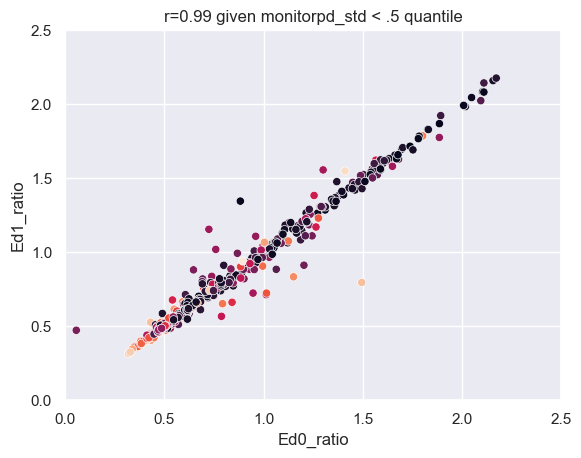

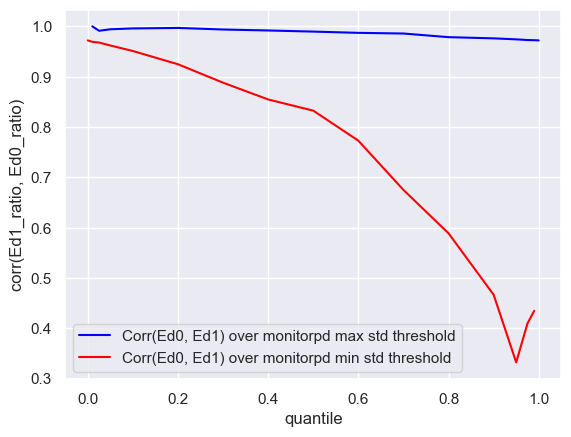

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

quantiles = [0, .01, .025, .05, .1, .2, .3, .4, .5, .6, .7, .8, .9, .95, .975, .99, 1]
sns.set_theme(style="darkgrid", palette="bright")
df_mask = df_utc["monitorpd_std"] < df_utc["monitorpd_std"].quantile(.5)
correlation = df_utc[df_mask]["frac_ed0"].corr(df_utc[df_mask]["frac_ed1"], method='pearson')
sns.scatterplot(data=df_utc[df_mask], x="frac_ed0", y="frac_ed1", c=df_utc[df_mask]["monitorpd_std"])
plt.title(f"r={round(correlation,2)} given monitorpd_std < .5 quantile")
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.xlabel('Ed0_ratio')
plt.ylabel('Ed1_ratio')

plt.show()

correlations = []
for quantile in quantiles:
    mask = df_utc["monitorpd_std"] < df_utc["monitorpd_std"].quantile(quantile)
    df_utc_masked = df_utc[mask]
    correlation = df_utc_masked["frac_ed0"].corr(df_utc_masked["frac_ed1"], method='pearson')
    correlations.append(correlation)
plt.plot(quantiles, correlations, color="blue", label="Corr(Ed0, Ed1) over monitorpd max std threshold")
correlations = []
for quantile in quantiles:
    mask = df_utc["monitorpd_std"] > df_utc["monitorpd_std"].quantile(quantile)
    df_utc_masked = df_utc[mask]
    correlation = df_utc_masked["frac_ed0"].corr(df_utc_masked["frac_ed1"], method='pearson')
    correlations.append(correlation)
plt.plot(quantiles, correlations, color="red", label="Corr(Ed0, Ed1) over monitorpd min std threshold")
plt.ylabel("corr(Ed1_ratio, Ed0_ratio)")
plt.xlabel("quantile")
plt.legend()
plt.show()

The above shows that the correlation between ed0 and ed1/lx fractions decreases the less we filter out high-std ("bad") samples. It also decrases much more aggressively the more we filter out low-std ("good") samples. This implies that there is a negative relationship between the correlation of ed0 and ed1 fractions on one hand and the dispersion of the photodiode luminosity metric which makes perfect sense intuitively.